In [1]:
%matplotlib inline
import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

mlt.style.use('ggplot')

In [2]:
!head -n 10 ~/projects/dataset/names/yob1880.txt

In [5]:
names1880 = pd.read_csv('~/projects/dataset/names/yob1880.txt', names=['name', 'sex', 'births'])

# What kinds of gender

In [7]:
names1880['sex'].unique()

array(['F', 'M'], dtype=object)

# The total births number for all kinds of gender

In [8]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [9]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

# Read all csv files 

## Question
> how to read many files at one time

> ipython hot key


In [11]:
namesall = []
for year in range(1880, 2011):
    path = '~/projects/dataset/names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    df['year'] = year
    namesall.append(df)
    
df_names = pd.concat(namesall, ignore_index=True)
df_names['year'].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [12]:
df_names.groupby(['year', 'sex']).sum().head(10)

births
year sex        
1880 F     90993
     M    110493
1881 F     91955
     M    100748
1882 F    107851
     M    113687
1883 F    112322
     M    104632
1884 F    129021
     M    114445

# pivot table

In [16]:
births = df_names.pivot_table('births', index='year', columns='sex', aggfunc=np.sum)
births.head(5)

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


# Plot

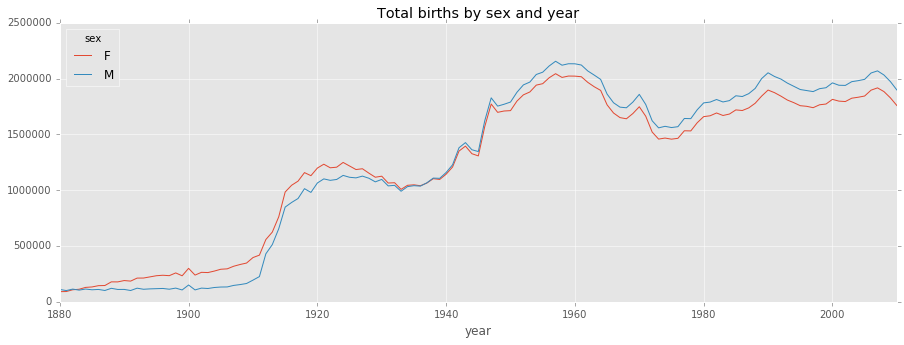

In [19]:
births.plot(title='Total births by sex and year', figsize=(15, 5))

# Case Study - "Last Letter" Revolution

http://www.babynamewizard.com/archives/2007/7/where-all-boys-end-up-nowadays

In 2007, Laura Wattenberg, a name reasearcher, said that the distribution of the last letter of boy names has changed significantly over the last 100 years

In [22]:
df_names['name'].str[-1].head()

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [23]:
df_last_letter = df_names[df_names['sex']=='M']
df_last_letter['last_letter'] = df_last_letter['name'].str[-1]
df_last_letter.head(10) 

,name,sex,births,year,last_letter
942,John,M,9655,1880,n
943,William,M,9533,1880,m
944,James,M,5927,1880,s
945,Charles,M,5348,1880,s
946,George,M,5126,1880,e
947,Frank,M,3242,1880,k
948,Joseph,M,2632,1880,h
949,Thomas,M,2534,1880,s
950,Henry,M,2444,1880,y
951,Robert,M,2416,1880,t


In [25]:
table = df_last_letter.pivot_table('births', index='last_letter', columns='year', aggfunc=np.sum)
table

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
a,776,767,773,757,817,713,775,700,819,704,...,39124,38815,37825,38650,36838,36156,34654,32901,31430,28438
b,509,470,506,452,496,441,452,434,468,389,...,50950,49284,48065,45914,43144,42600,42123,39945,38862,38859
c,349,331,349,299,319,301,283,261,305,271,...,27113,27238,27697,26778,26078,26635,26864,25318,24048,23125
d,9177,8387,9702,8796,9856,9214,9710,9033,10600,10167,...,60838,55829,53391,51754,50670,51410,50595,47910,46172,44398
e,13493,12406,14613,13191,14637,14048,14475,13212,15744,14389,...,145395,144651,144769,142098,141123,142999,143698,140966,135496,129012
f,108,83,135,106,131,115,112,124,140,124,...,1758,1817,1819,1904,1985,1968,2090,2195,2212,2255
g,147,146,146,135,160,182,141,117,190,124,...,2151,2084,2009,1837,1882,1929,2040,2059,2396,2666
h,4049,3766,4176,3925,4242,4055,4087,3951,4638,4261,...,85959,88085,88226,89620,92497,98477,99414,100250,99979,98090
i,200,206,207,167,158,147,171,139,181,154,...,20980,23610,26011,28500,31317,33558,35231,38151,40912,42956


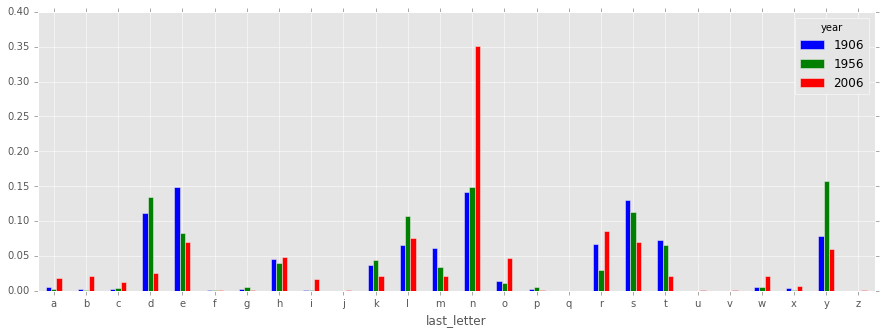

In [34]:
subtable = table[[1906, 1956, 2006]]
ratio_subtable = subtable / subtable.sum(axis=0)
ratio_subtable.plot(kind='bar', rot=0, figsize=(15, 5))

# Examine all the years!

In [35]:
ratio_table = table / table.sum(axis=0)
dny = ratio_table.ix[['d', 'n', 'y']]
dny

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
last_letter,,,,,,,,,,,,,,,,,,,,,
d,0.083055,0.083247,0.085340,0.084066,0.086120,0.085472,0.087647,0.089072,0.087707,0.091934,...,0.031352,0.028794,0.027069,0.026118,0.025420,0.025075,0.024451,0.023574,0.023398,0.023387
n,0.153213,0.153214,0.149560,0.151646,0.149915,0.146361,0.149659,0.148838,0.151286,0.151976,...,0.317495,0.325086,0.336344,0.341151,0.344319,0.351666,0.358274,0.361101,0.362523,0.362771
y,0.075760,0.077451,0.077537,0.079144,0.080405,0.081882,0.081681,0.082870,0.084919,0.086328,...,0.071687,0.069397,0.066197,0.064781,0.062806,0.060338,0.059634,0.060342,0.057223,0.058168


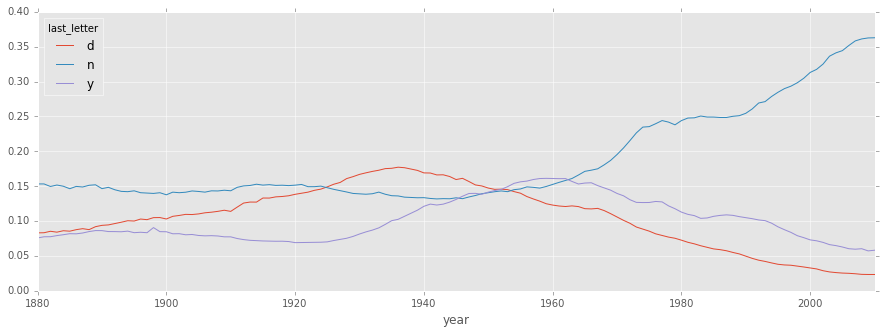

In [37]:
dny.T.plot(rot=0, figsize=(15, 5))

# How to continue your research?

Google: name ending with n 1950


## Lab - Boy names that became girl names